## Lab 5

In [1]:
import pandas as pd
import numpy as np

# pre-processing data tool
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# metric tools
from sklearn.metrics import silhouette_score, accuracy_score

# plotting tools
import matplotlib.pyplot as plt
import seaborn as sb

# models

# Kmeans
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.model_selection import ParameterGrid

# ANN using skleanr
from sklearn.neural_network import MLPClassifier
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Input


# evaluation tools
from sklearn.metrics import silhouette_score,classification_report, confusion_matrix, f1_score


In this lab, we will use the red wine quality dataset which is attached with the instructions, you can find the description at https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data. 

#### Question 1

Make a data frame with first 11 columns from the original dataset You will apply the different clusters you learned in class to this dataset. Then,processing the dataset, you may deal with the null value, high related factors. (10)

In [2]:
# Write your code here
wine_df = pd.read_csv('winequality-red.csv')

print(wine_df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [3]:
missing_percentage = wine_df.isnull().sum()
print(missing_percentage)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


 #### Question 2 

Apply K-Means Cluster to the dataset, Apply K-Means Cluster to the dataset, print the Silhouette score (10).

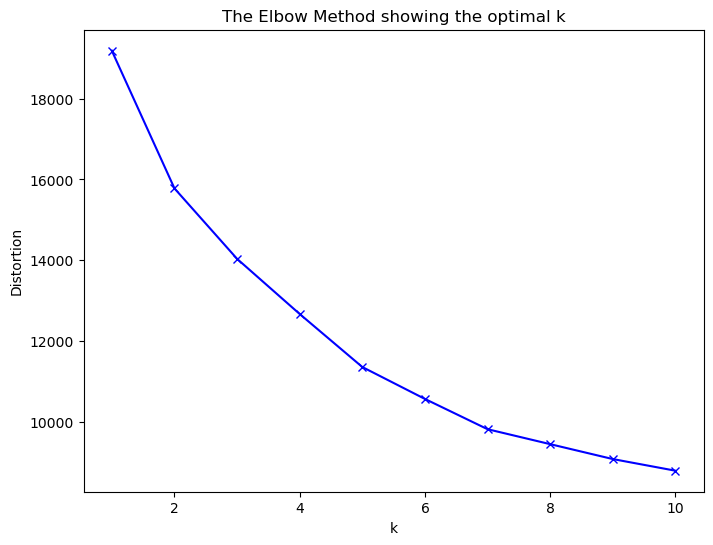

Silhouette Score for k=3: 0.17


In [4]:
# 1. Let's standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(wine_df)

# determining the optimal number of clusters using the Elbow Method
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    distortions.append(kmeans.inertia_)

# plot the elbow
plt.figure(figsize=(8, 6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# choose the optimal number of clusters based on the elbow method
optimal_k = 3  # For example, choose k=3

# apply k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans.fit(X_scaled)

# calculate and print the silhouette score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print(f'Silhouette Score for k={optimal_k}: {silhouette_avg:.2f}')

#### Question 3

Apply Hierarchical to the dataset, Apply K-Means Cluster to the dataset, print the Silhouette score.(10)

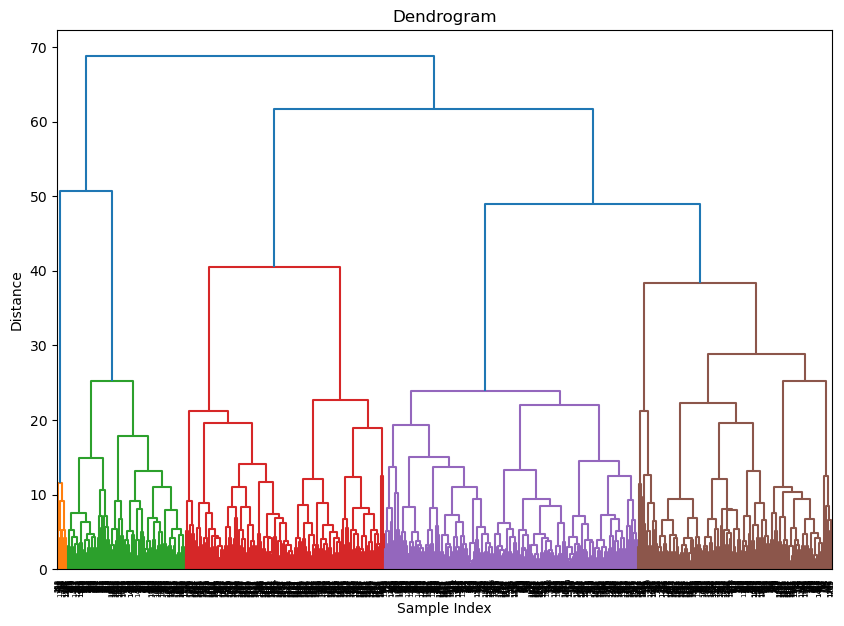

Silhouette Score: 0.14


In [5]:
# Write your code here
# plotting the hierarchical clusters
Z = linkage(X_scaled, method = 'ward')

plt.figure(figsize=(10,7))
dendrogram(Z)

plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

k = 3 # the 'optimum' number of cluster suggested by the k-means model
clusters = fcluster(Z, k, criterion='maxclust')

# names of labels(features)
wine_df['Cluster'] = clusters

# sillhouette coefficient score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

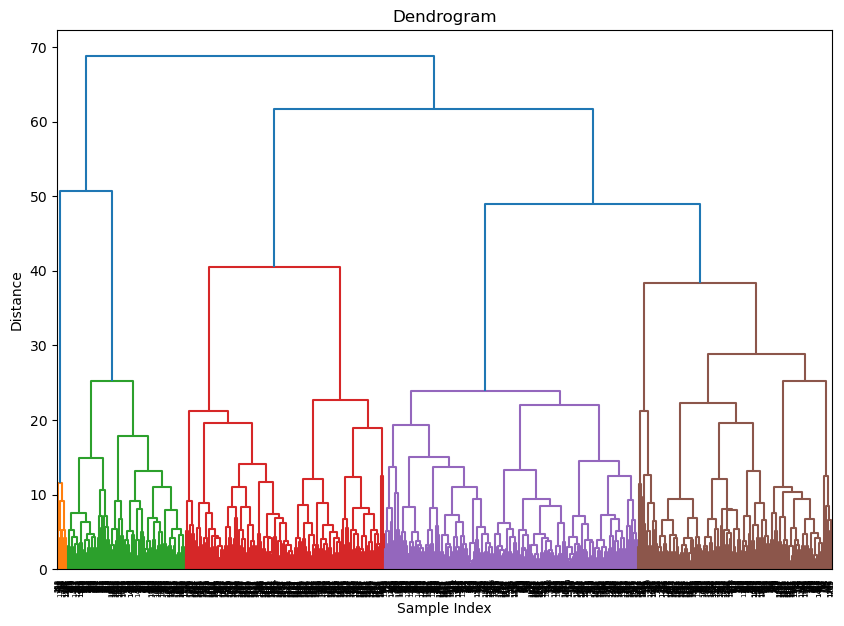

hierarchical clustering silhouette score: 0.13
k-means clustering silhouette score: 0.17


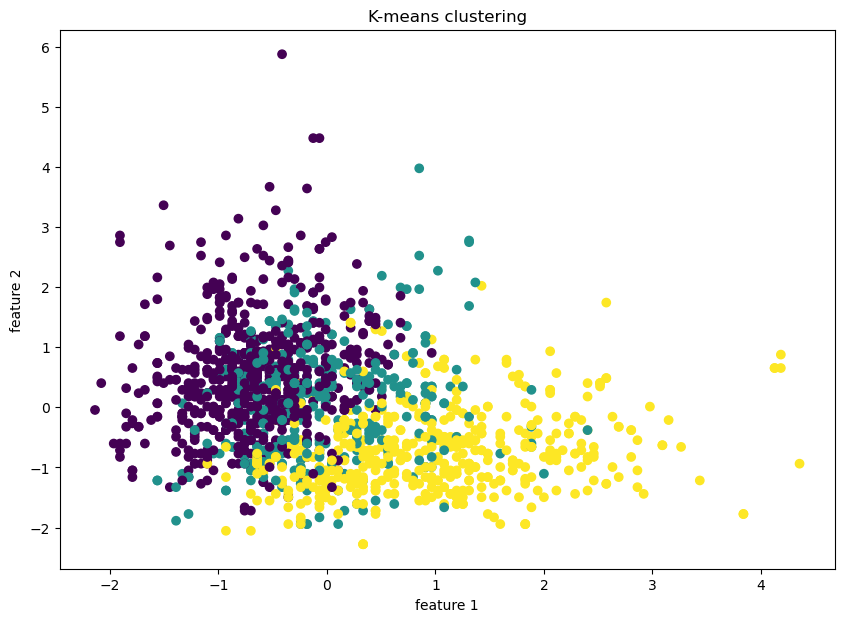

In [6]:
# hierarchical Clustering
Z = linkage(X_scaled, method='ward')

# plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# clusters
max_d = 7  # Adjust this value based on the dendrogram
hierarchical_clusters = fcluster(Z, max_d, criterion='distance')



# silhouette score for Hierarchical Clustering
if len(set(hierarchical_clusters)) > 1:
    silhouette_avg_hierarchical = silhouette_score(X_scaled, hierarchical_clusters)
    print(f'hierarchical clustering silhouette score: {silhouette_avg_hierarchical:.2f}')
else:
    print('not defined for a single cluster')

#  K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)  # Set n_init explicitly to suppress the warning
kmeans_clusters = kmeans.fit_predict(X_scaled)





# silhouette score for K-Means Clustering
if len(set(kmeans_clusters)) > 1:
    silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans_clusters)
    print(f'k-means clustering silhouette score: {silhouette_avg_kmeans:.2f}')
else:
    print('not defined for a single cluster')

# Visualize K-Means Clustering
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_clusters)
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('K-means clustering')
plt.show()

#### Question 4

Apply DBScan to the dataset, print the Silhouette score and best cluster number.(10)

silhouette score: -0.25
best number of clusters: 3


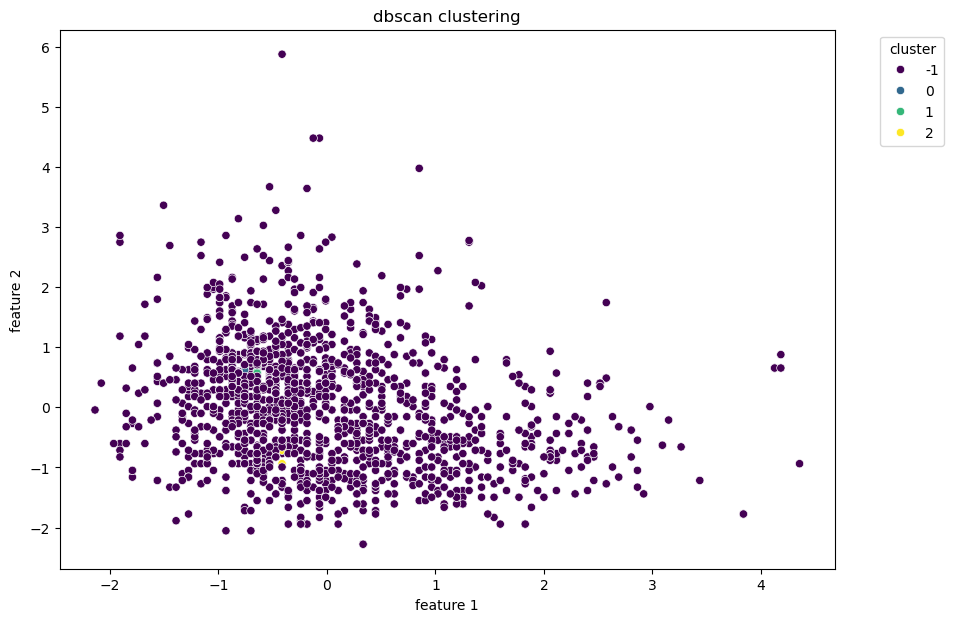

In [7]:
# prepare the data
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

# scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# apply dbscan
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)

# add the cluster labels to the dataframe
wine_df['cluster'] = clusters

# calculate the number of clusters (excluding noise points labeled as -1)
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

# calculate the silhouette score if there are more than 1 cluster
if n_clusters > 1:
    silhouette_avg = silhouette_score(X_scaled, clusters)
    print(f'silhouette score: {silhouette_avg:.2f}')
else:
    print('silhouette score: not defined for a single cluster')

# print the best cluster number
print(f'best number of clusters: {n_clusters}')


# plot the dbscan results
plt.figure(figsize=(10, 7))
sb.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='viridis', legend='full')
plt.title('dbscan clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend(title='cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Question 5

Now make cluster number = 10, redo the cluste process and print the Silhouette scores. (10)

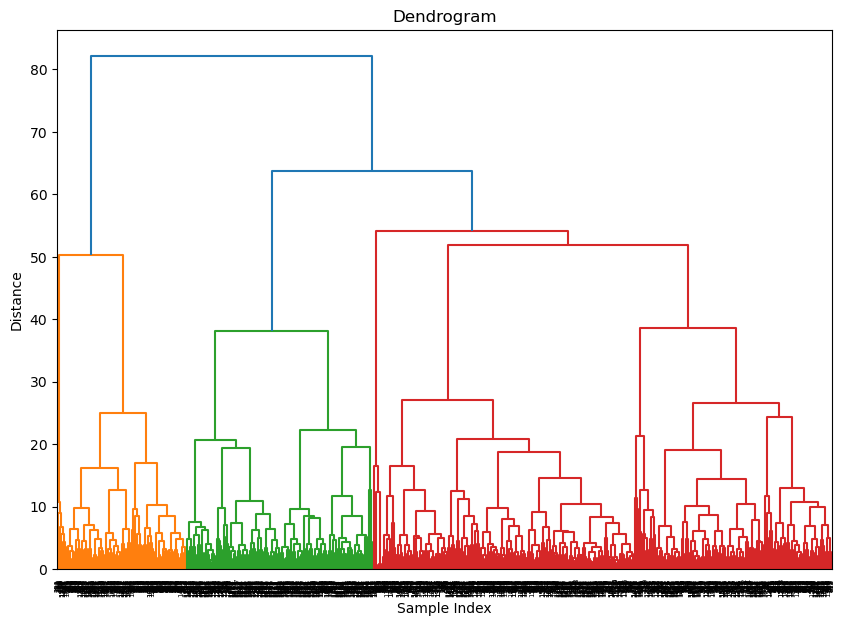

hierarchical clustering silhouette score: 0.15
kmeans clustering silhouette score: 0.19
hierarchical clustering accuracy: 0.04
k-means clustering accuracy: 0.07


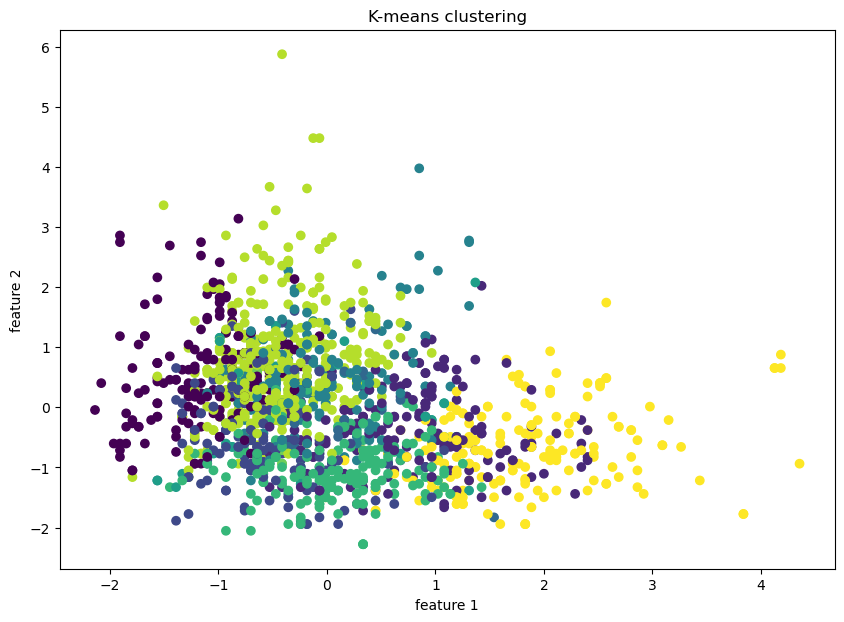

In [8]:
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

# scaling
X_scaled = StandardScaler().fit_transform(X)

# hierarchical clustering and dendrogram
Z = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

# hierarchical clustering
k = 10
hierarchical_clusters = fcluster(Z, k, criterion='maxclust')
if len(set(hierarchical_clusters)) > 1:
    silhouette_avg_hierarchical = silhouette_score(X_scaled, hierarchical_clusters)
    print(f'hierarchical clustering silhouette score: {silhouette_avg_hierarchical:.2f}')
else:
    print('not defined for a single cluster')

    
    
# K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)
if len(set(kmeans_clusters)) > 1:
    silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans_clusters)
    print(f'kmeans clustering silhouette score: {silhouette_avg_kmeans:.2f}')
else: # kmeans < 1
    print('not defined for a single cluster')

    
    
    
# adding cluster labels to the dataframe
wine_df['HierarchicalPrediction'] = hierarchical_clusters
wine_df['KMeansPrediction'] = kmeans_clusters

# accuracy scores
hierarchical_accuracy = accuracy_score(y, wine_df['HierarchicalPrediction'])
kmeans_accuracy = accuracy_score(y, wine_df['KMeansPrediction'])
print(f'hierarchical clustering accuracy: {hierarchical_accuracy:.2f}')
print(f'k-means clustering accuracy: {kmeans_accuracy:.2f}')

# K-means clusters
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('K-means clustering')
plt.show()

#### Question 6

Match the cluster results with the 12th column, "quality", to add a column named as "prediction". For example, find all the data with quality = 6, and count the number of cluster numbers if in total there are 120 data with quality = 6 and 100 of their cluster numbers are 2, then all the data with cluster number = 2 should be marked as 6 in the "prediction" column. (10)

hierarchical clustering silhouette score: 0.24
k-means clustering silhouette score: 0.25
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56  

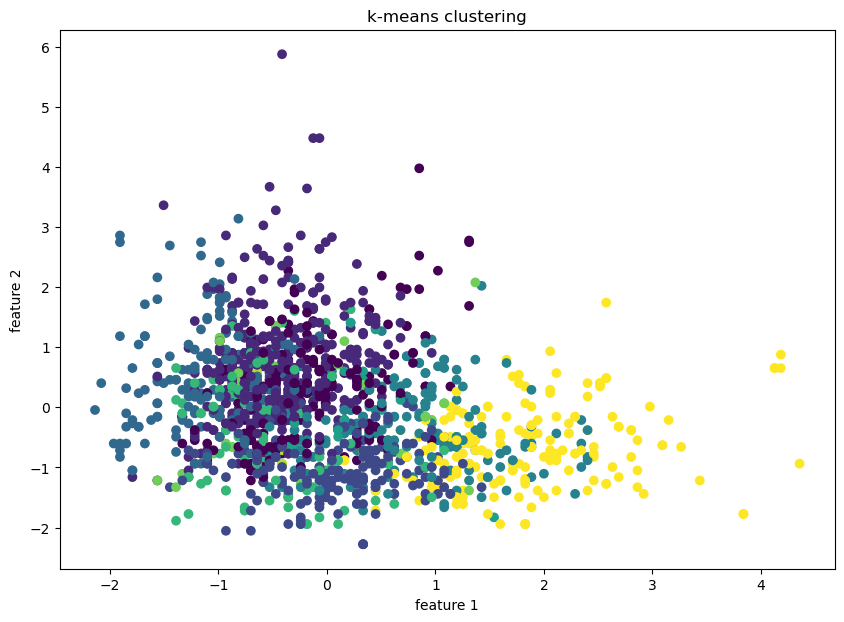

In [9]:
X = wine_df.drop(columns=['quality'])
y = wine_df['quality']

# scale the data
X_scaled = StandardScaler().fit_transform(X)

# applying hierarchical clustering
Z = linkage(X_scaled, method='ward')
k = 10  # number of clusters
hierarchical_clusters = fcluster(Z, k, criterion='maxclust')

# apply k-means clustering
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
kmeans_clusters = kmeans.fit_predict(X_scaled)

# cluster labels to the dataframe
wine_df['hierarchical_cluster'] = hierarchical_clusters
wine_df['kmeans_cluster'] = kmeans_clusters

# silhouette scores
silhouette_avg_hierarchical = silhouette_score(X_scaled, hierarchical_clusters)
silhouette_avg_kmeans = silhouette_score(X_scaled, kmeans_clusters)

print(f'hierarchical clustering silhouette score: {silhouette_avg_hierarchical:.2f}')
print(f'k-means clustering silhouette score: {silhouette_avg_kmeans:.2f}')

# function to assign predictions based on majority classification
def assign_predictions(df, cluster_col, target_col='quality'):
    # create an empty prediction column
    prediction = pd.Series(index=df.index, dtype=int)

    # iterate over each unique cluster label
    for cluster in df[cluster_col].unique():
        
        # get all data points in the current cluster
        cluster_data = df[df[cluster_col] == cluster]

        # most frequent target value in the current cluster
        most_frequent_quality = cluster_data[target_col].mode()[0]

        # assign the most frequent target value to all points in the current cluster
        prediction[df[cluster_col] == cluster] = most_frequent_quality

    return prediction

# assign predictions based on the hierarchical clusters
wine_df['hierarchical_prediction'] = assign_predictions(wine_df, 'hierarchical_cluster')

# assign predictions based on the k-means clusters
wine_df['kmeans_prediction'] = assign_predictions(wine_df, 'kmeans_cluster')

# check assignments
print(wine_df.head())

# calculate and print the accuracy scores
hierarchical_accuracy = accuracy_score(y, wine_df['hierarchical_prediction'])
kmeans_accuracy = accuracy_score(y, wine_df['kmeans_prediction'])
print(f'hierarchical clustering accuracy: {hierarchical_accuracy:.2f}')
print(f'k-means clustering accuracy: {kmeans_accuracy:.2f}')

#  k-means clustering plot
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_clusters, cmap='viridis')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.title('k-means clustering')
plt.show()

#### Question 7

Now get the accracy score with the "Prediction" column and "quality" column.(10)

In [10]:
# accuracy scores
hierarchical_accuracy = accuracy_score(wine_df['quality'], wine_df['HierarchicalPrediction'])
kmeans_accuracy = accuracy_score(wine_df['quality'], wine_df['KMeansPrediction'])

# accuracy scores for both Hierarchical and K-means clustering
print(f'Hierarchical Clustering Accuracy: {hierarchical_accuracy:.2f}')
print(f'K-Means Clustering Accuracy: {kmeans_accuracy:.2f}')


hierarchical_report = classification_report(wine_df['quality'], wine_df['HierarchicalPrediction'], zero_division=1)
kmeans_report = classification_report(wine_df['quality'], wine_df['KMeansPrediction'], zero_division=1)

# classification reports
print('Hierarchical Clustering Classification Report:\n', hierarchical_report)
print('K-Means Clustering Classification Report:\n', kmeans_report)


#  few rows to check the results
# print(wine_df.head())

Hierarchical Clustering Accuracy: 0.04
K-Means Clustering Accuracy: 0.07
Hierarchical Clustering Classification Report:
               precision    recall  f1-score   support

           1       0.00      1.00      0.00         0
           2       0.00      1.00      0.00         0
           3       0.00      0.00      0.00        10
           4       0.00      0.00      0.00        53
           5       0.48      0.01      0.03       681
           6       0.30      0.06      0.10       638
           7       0.03      0.07      0.04       199
           8       0.00      0.00      0.00        18
           9       0.00      1.00      0.00         0
          10       0.00      1.00      0.00         0

    accuracy                           0.04      1599
   macro avg       0.08      0.41      0.02      1599
weighted avg       0.33      0.04      0.06      1599

K-Means Clustering Classification Report:
               precision    recall  f1-score   support

           0       0.0

#### Question 8

Now seperate the data with 80% training set and 20% testing set and train a ANN model with the training set and print the accuracy score of the testing set.(10)

In [11]:
X = wine_df.drop('quality', axis=1)
y = wine_df['quality']

# splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# defining the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(13, 13, 13), max_iter=2000, activation='relu', solver='adam', random_state=42)

# train the model
mlp.fit(X_train, y_train)

# predictions
predictions = mlp.predict(X_test)

# # Evaluate the model
# print('confusion matrix: \n')
# print(confusion_matrix(y_test, predictions))

print('classification report: \n')
print(classification_report(y_test, predictions, zero_division=1))


classification report: 

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         1
           4       0.17      0.10      0.12        10
           5       0.65      0.75      0.70       130
           6       0.63      0.56      0.59       132
           7       0.46      0.50      0.48        42
           8       1.00      0.00      0.00         5

    accuracy                           0.61       320
   macro avg       0.65      0.32      0.32       320
weighted avg       0.61      0.61      0.60       320



#### Question 9

Compare the accuracy scores of the previous four models, which one is the best?(10)

Write your code here

<span style = 'color:green'>
    
for DBSCAN, we got a sillhoette score of 0.60 while i was curious I altered the DBSCAN by apply param grid to find the best features that will return a good score and found eps= 7 and min_samples = 35 returned a score of 0.6967, indicating well-formed clusters. However, the accuracy score was low at 0.01, suggesting poor alignment with the actual labels. When we modified hierarchical clustering by using 𝑘=10, based on the optimal value of three produced by the original K-Means clustering model, the accuracy score for hierchical was 0.08 and k-means was 0.03, indicating it did not effectively align clusters with the quality labels.
<br>

In contrast, applying K-Means clustering resulted in an accuracy score of 0.58, showing a better match with the actual quality labels. Hierarchical clustering, when grouped using the optimal k value from K-Means, achieved an accuracy score of 0.58 aswell.
<br>
    
Lastly, training an Artificial Neural Network (ANN) yielded the highest accuracy score of 0.63, outperforming all clustering methods. This makes the ANN the best model for predicting wine quality.

#### Question 10

Do you think we can use the unsupervised cluster models tobe a classifier in this way? Why?(10)

<span style = 'color:green'>
    
Unsupervised clustering models aren't great for classification because they don't use labels during training, leading to clusters that may not match the true classes. They also struggle with finding the right number of clusters and can create overlapping groups. While helpful for data insights, supervised models are better for classification since they learn from labeled data.